# Productivy Dataset - Statistical Analysis

In [85]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
# removes whitespace from all the entries

rawData = pd.read_csv("../Datasets/originalProductivity.tsv", sep='\t', header=0, nrows=None)

dataWithoutTabs = rawData.copy()

for row in range(rawData.shape[0]):
    for column in range(rawData.shape[1]):
        entry = rawData.iloc[row][column]
        if entry.endswith((('\t', '\n', '\x0b', '\x0c', '\r', '\v', '\f', ' '))):
            dataWithoutTabs.iloc[row][column] = rawData.iloc[row][column][:-1]

for column in rawData.columns:
    if column.endswith((('\t', '\n', '\x0b', '\x0c', '\r', '\v', '\f', ' '))):
        dataWithoutTabs.rename(columns={column: column[:-1]}, inplace=True)

In [87]:
# removes rows with more NaNs than actual values

dataWithoutNans = dataWithoutTabs.copy()

for row in range(rawData.shape[0]):
    countNa = 0
    for column in range(rawData.shape[1]):
        if ':' in rawData.iloc[row][column]:
            countNa += 1

    if countNa >= math.floor(rawData.shape[1]/2):
        dataWithoutNans.drop(row, axis=0, inplace=True)

dataWithoutNans.reset_index(inplace=True, drop=True)

In [88]:
# inferes remaining NaNs values from the near past or future

dataWithInferences = dataWithoutNans.copy()

for row in range(dataWithoutNans.shape[0]):
    for column in range(dataWithoutNans.shape[1]):
        if dataWithoutNans.iloc[row][column] == ':':
            if column == 0:
                dataWithInferences.iloc[row][column] = dataWithInferences.iloc[row][column+1]
            else:
                dataWithInferences.iloc[row][column] = dataWithInferences.iloc[row][column-1]

In [89]:
# removes flags and turns entries into floats

dataWithoutFlags = dataWithInferences.copy()

for row in range(dataWithInferences.shape[0]):
    for column in range(dataWithInferences.shape[1]):
        try:
            dataWithoutFlags.iloc[row][column] = float(dataWithInferences.iloc[row][column])
        except:
            if (dataWithInferences.iloc[row][column][0] == 'A'):
                continue

            dataWithoutFlags.iloc[row][column] = float(dataWithInferences.iloc[row][column][:-2])

In [90]:
# splits data into two distinct dataFrames: ProductivityPerHourWorked & ProductivityPerPerson

cleanedDataProductivityPerHourWorked = dataWithoutFlags.copy()
cleanedDataProductivityPerPerson = dataWithoutFlags.copy()

for row in range(dataWithoutFlags.shape[0]):
    if "NLPR_HW" in dataWithoutFlags.iloc[row][0]:
        cleanedDataProductivityPerPerson.drop(row, axis=0, inplace=True)
    else:
        cleanedDataProductivityPerHourWorked.drop(row, axis=0, inplace=True)

cleanedDataProductivityPerHourWorked.reset_index(inplace=True, drop=True)
cleanedDataProductivityPerPerson.reset_index(inplace=True, drop=True)

In [91]:
# makes the first column (containing the country codes) easier to use

cleanedData = cleanedDataProductivityPerHourWorked.copy()

numberOfRowsPHW = cleanedData.shape[0]

for row in range(numberOfRowsPHW):
    cleanedData.iloc[row][0] = cleanedData.iloc[row][0].split(",")[-1]

cleanedData.rename(columns={'freq,unit,na_item,geo\TIME_PERIOD': 'countryCode'}, inplace=True)

Text(0.5, 1.0, 'Labour productivity per hour worked by country - from 2005 to 2021 (inclusive)')

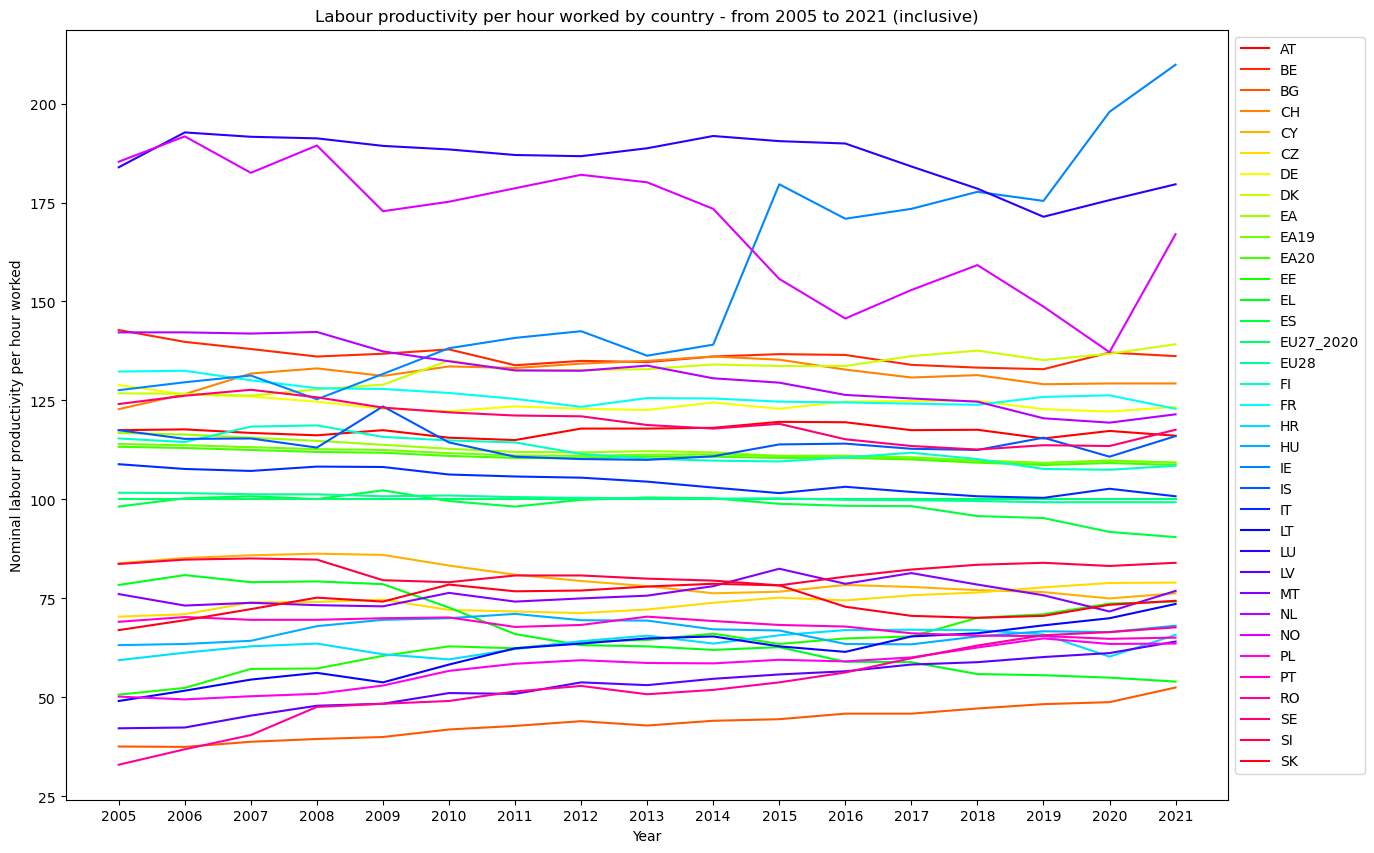

In [92]:
# plots every country throughout time

plt.figure(figsize=(15, 10))

colorsPHW = plt.cm.hsv(np.linspace(0, 1, numberOfRowsPHW))

for row in range(numberOfRowsPHW):
    countryCode = cleanedData.iloc[row][0]
    plt.plot(np.array(cleanedData.columns[1:]), cleanedData.iloc[row][1:], color=colorsPHW[row], label=countryCode)

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Nominal labour productivity per hour worked') 
plt.title("Labour productivity per hour worked by country - from 2005 to 2021 (inclusive)")

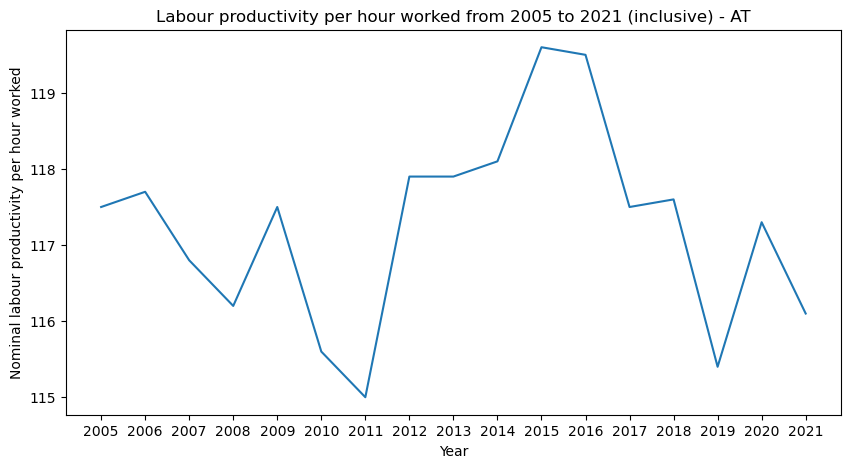

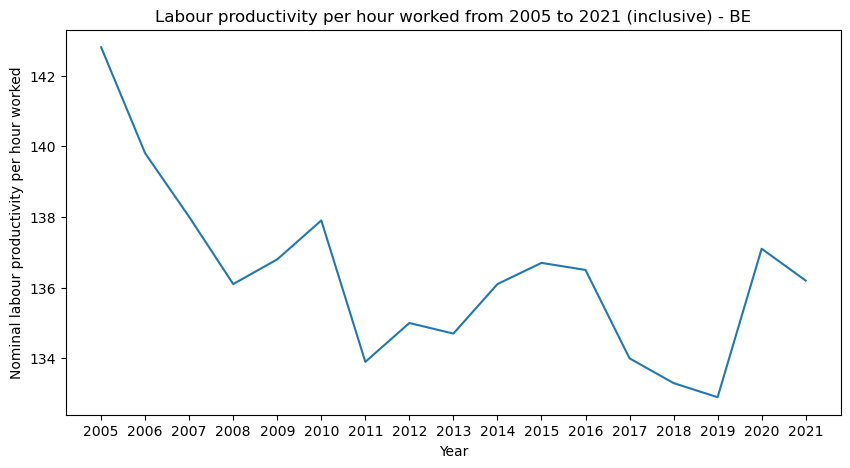

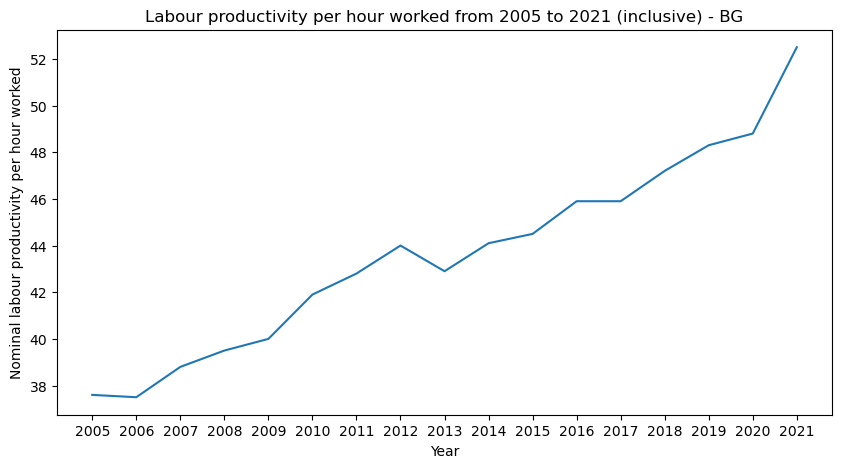

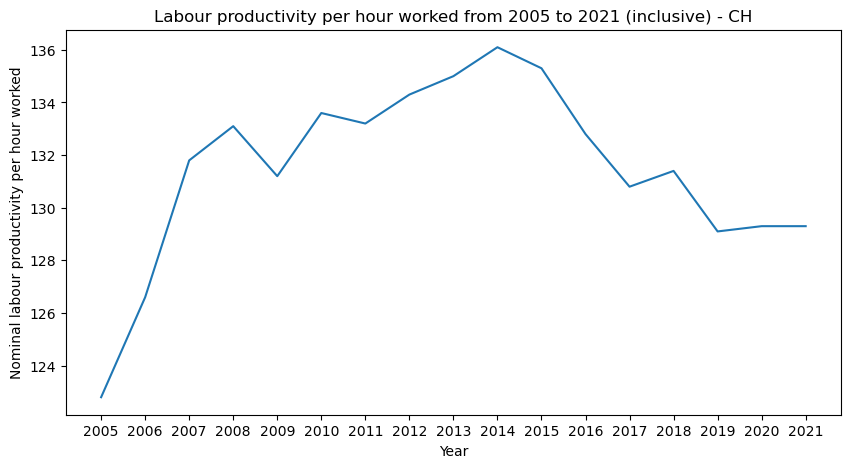

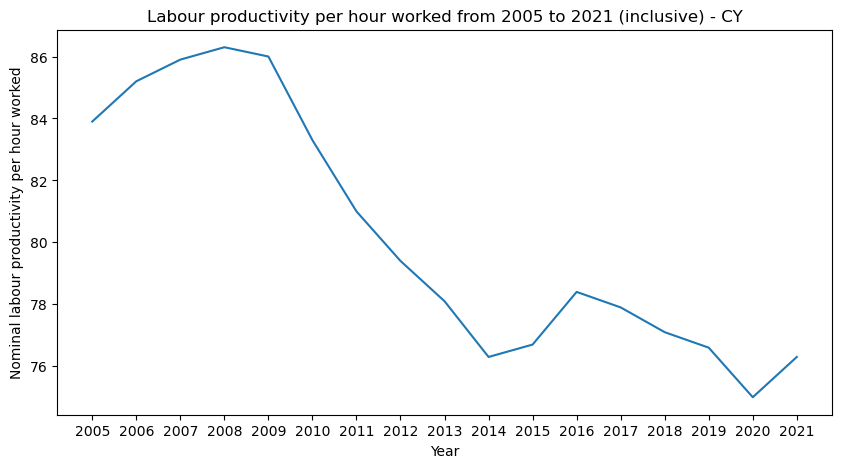

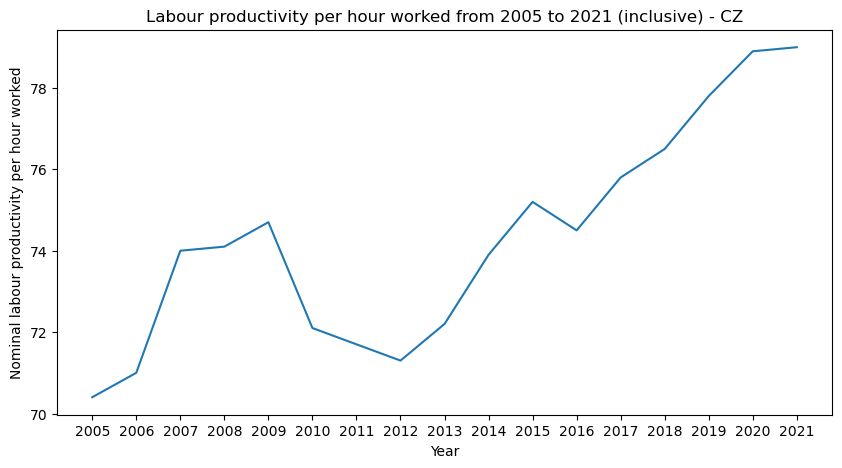

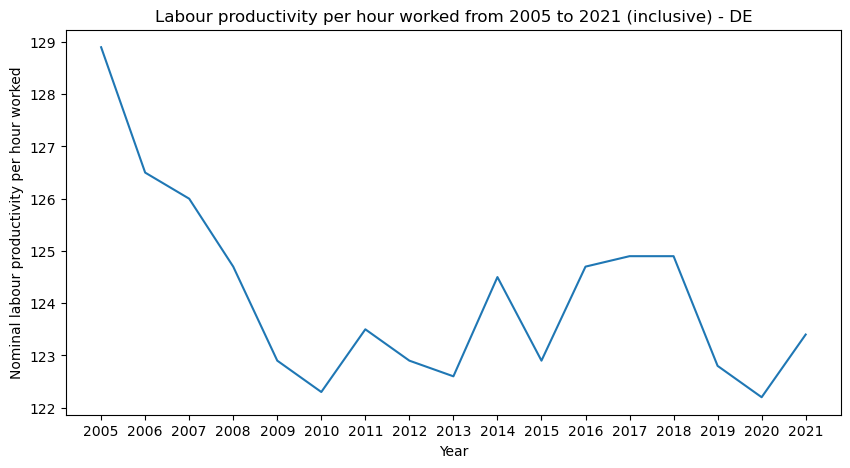

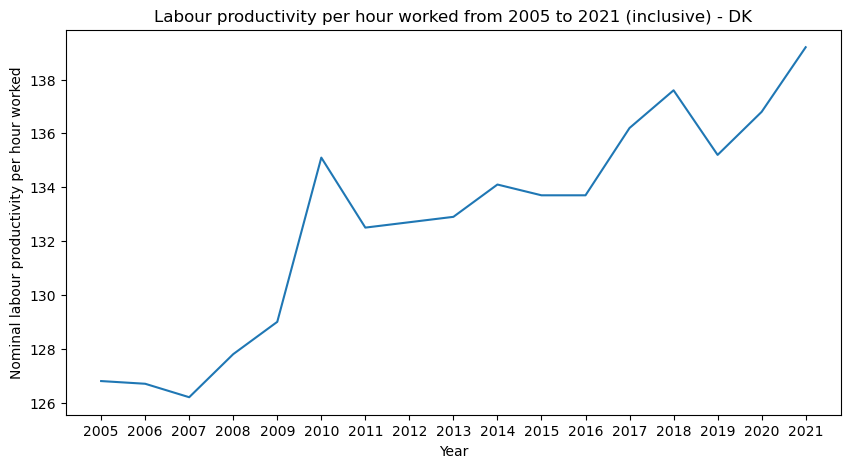

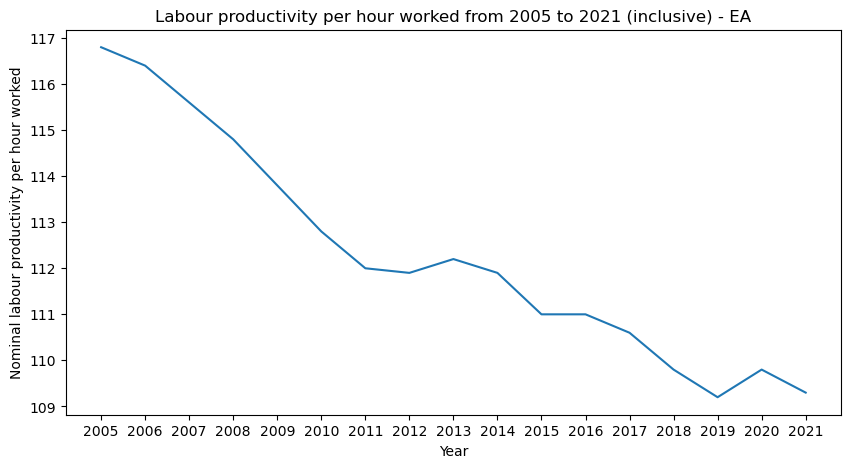

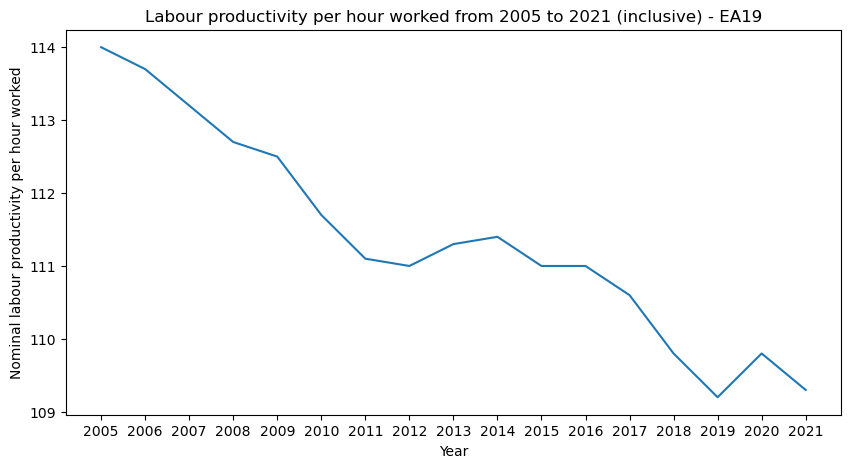

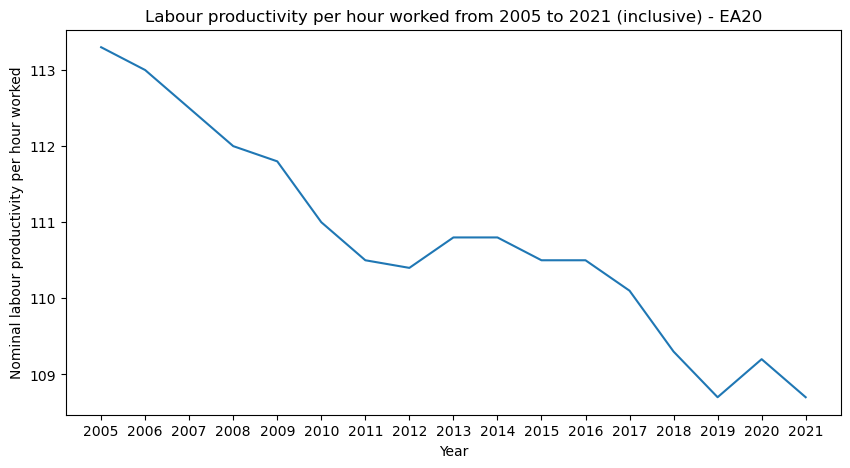

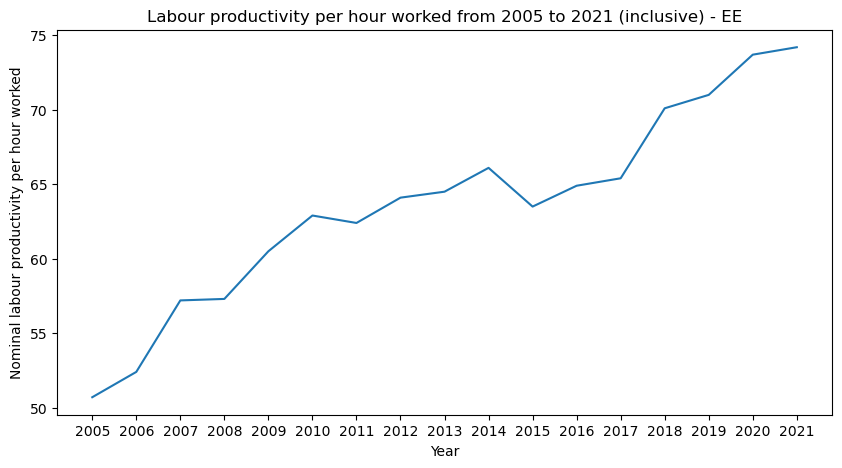

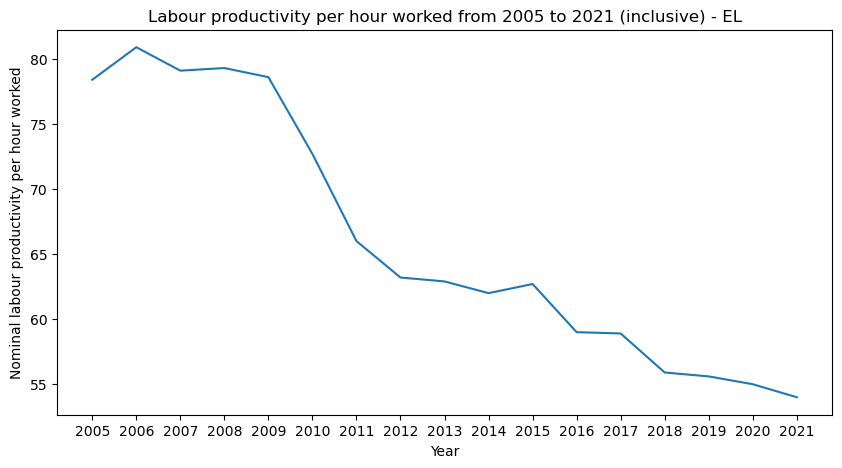

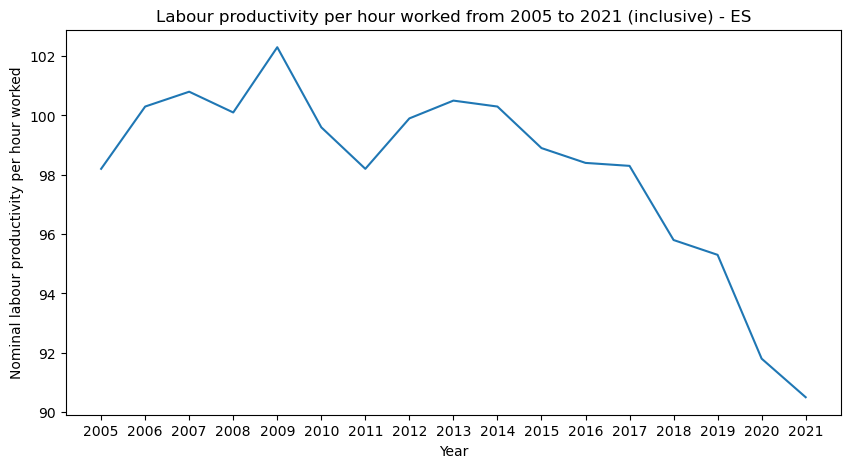

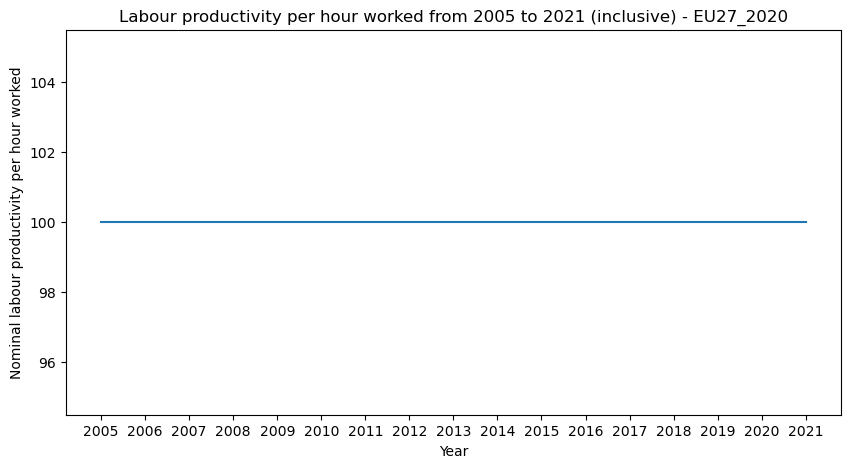

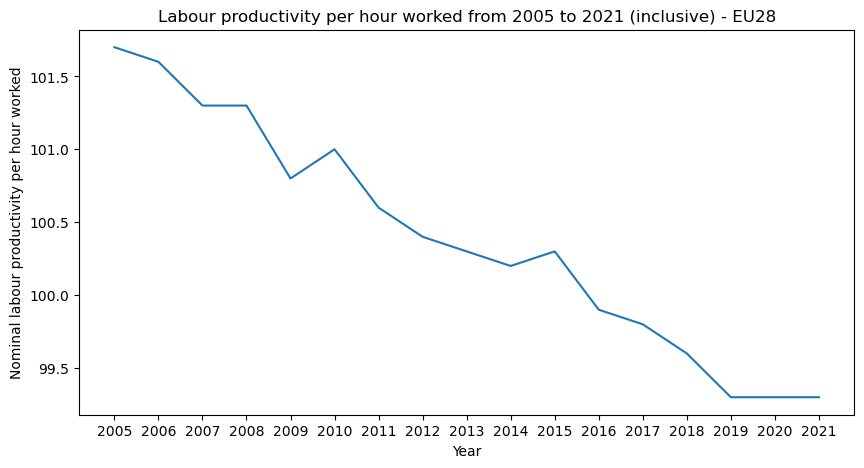

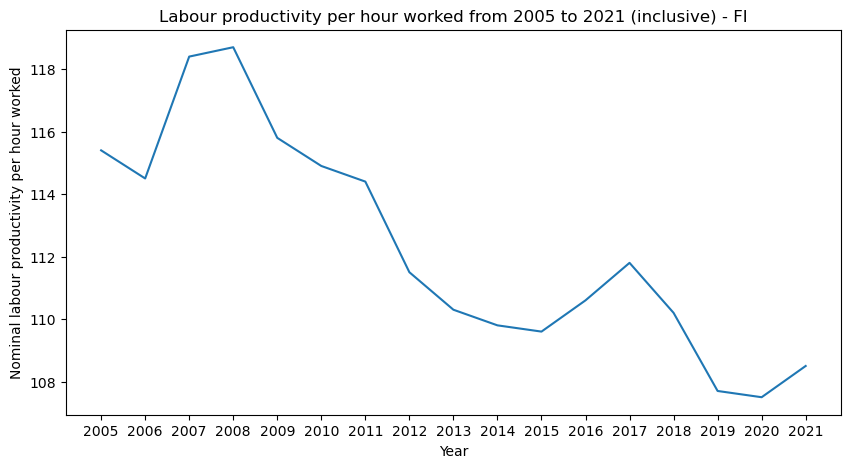

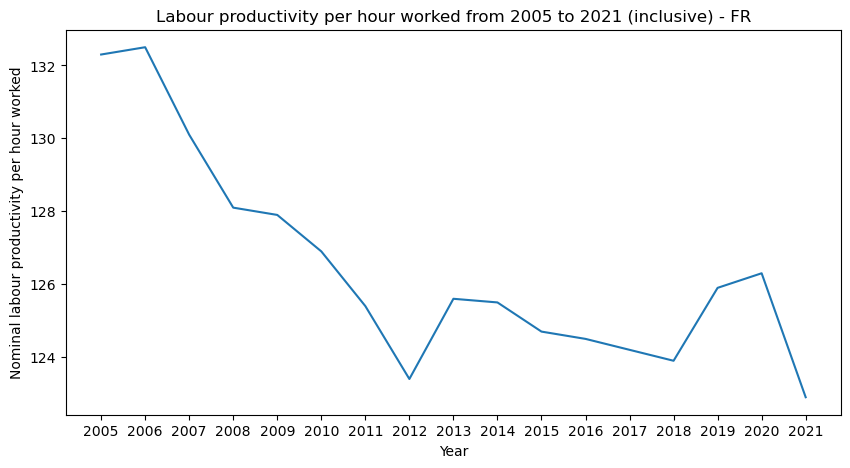

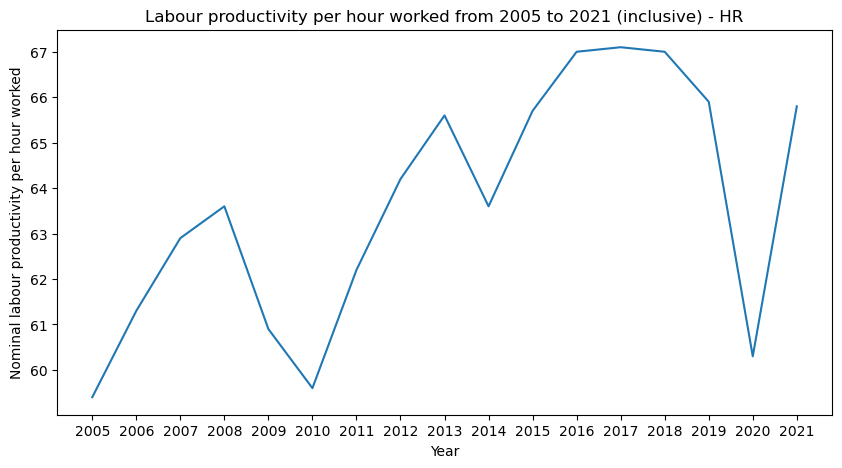

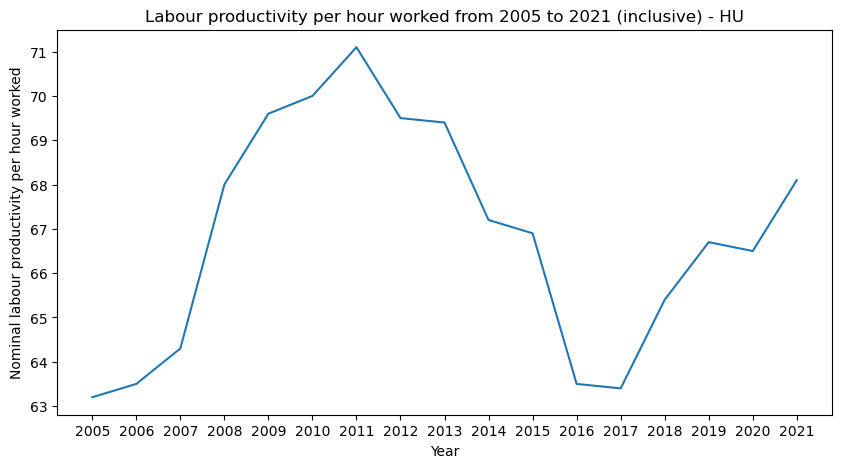

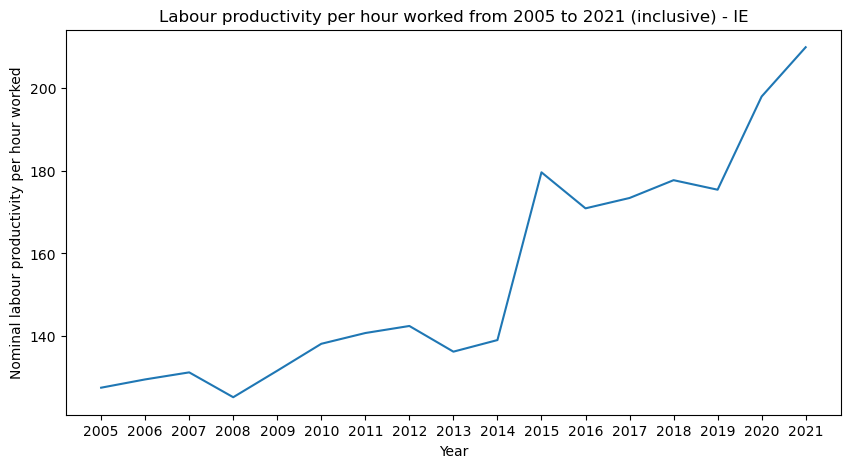

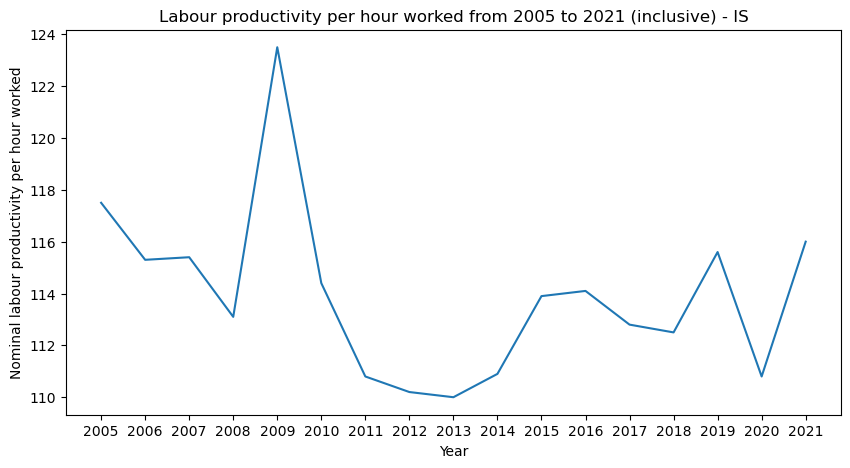

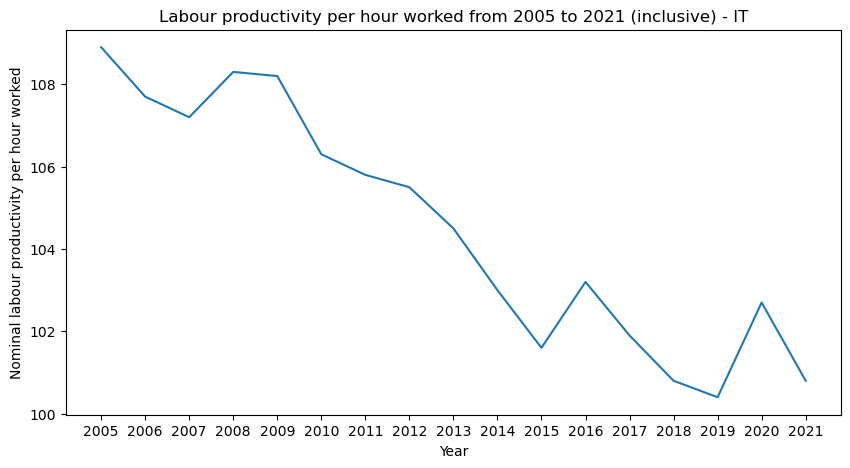

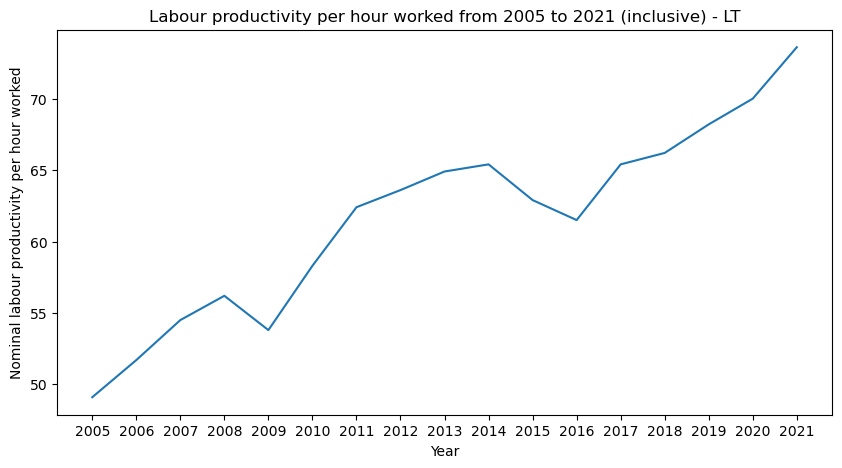

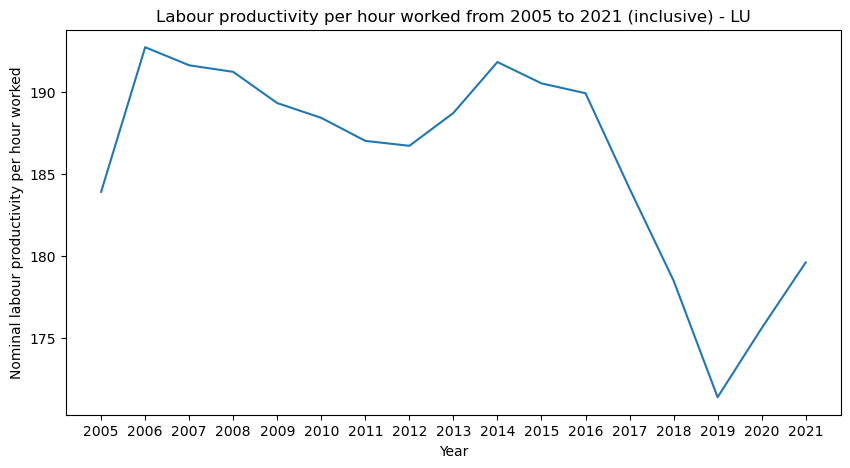

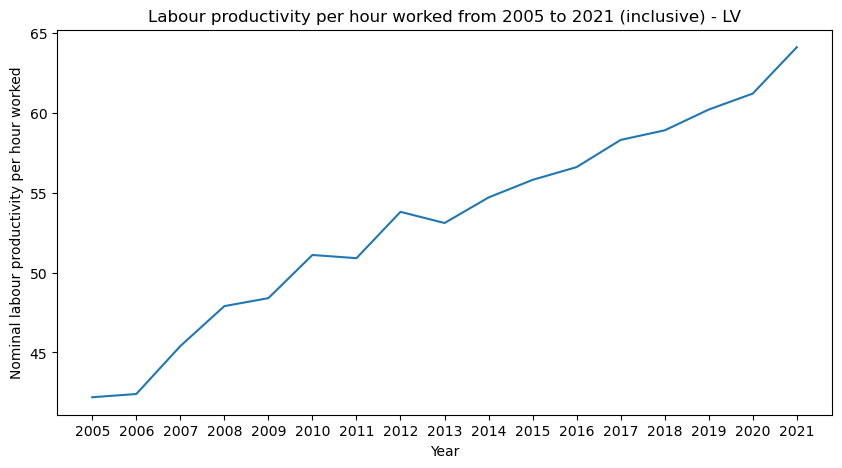

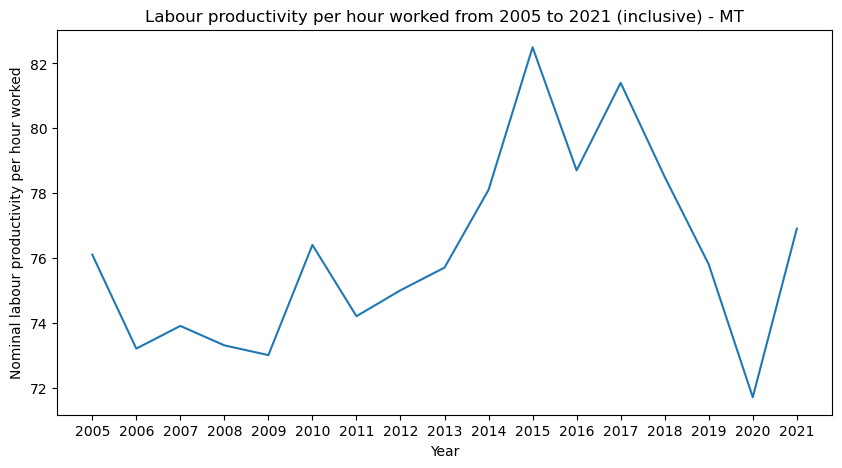

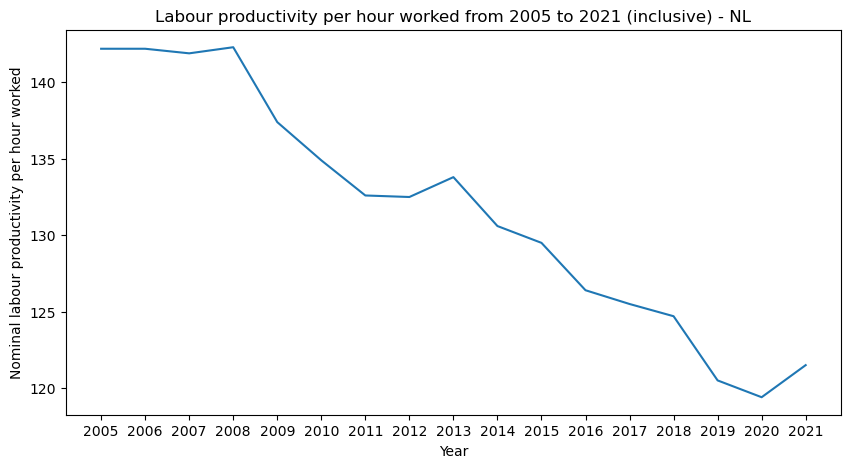

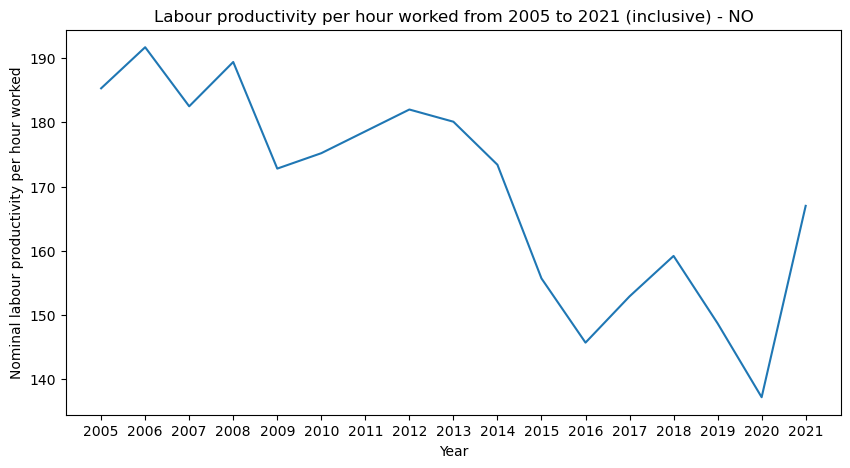

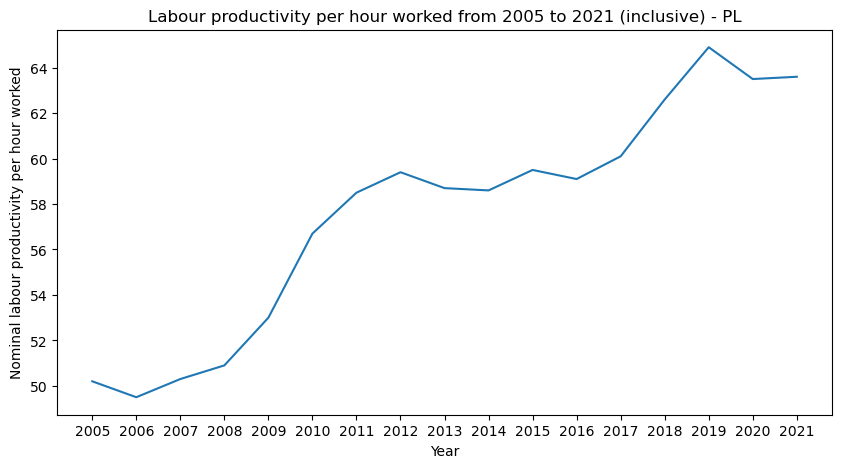

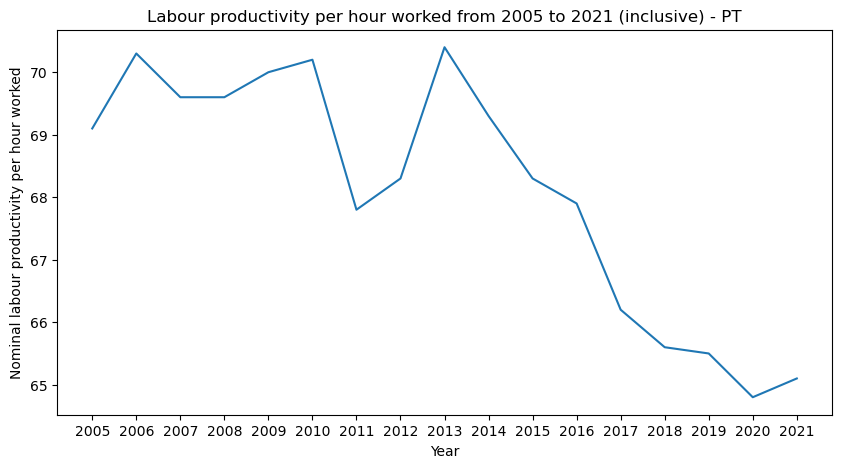

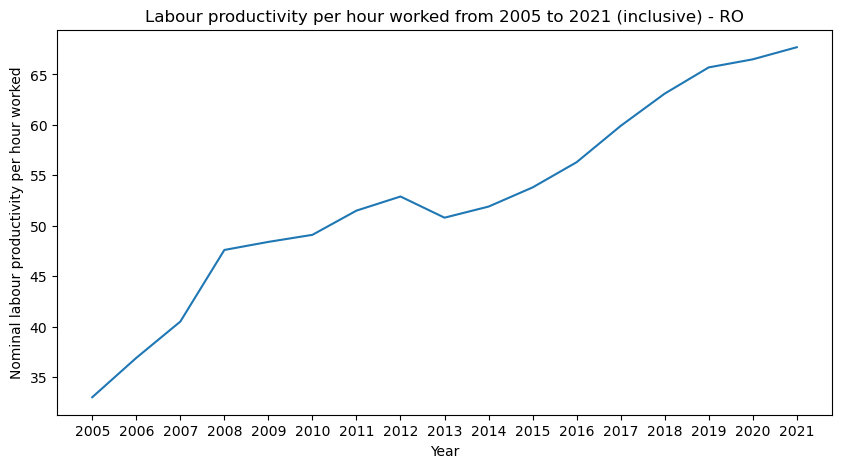

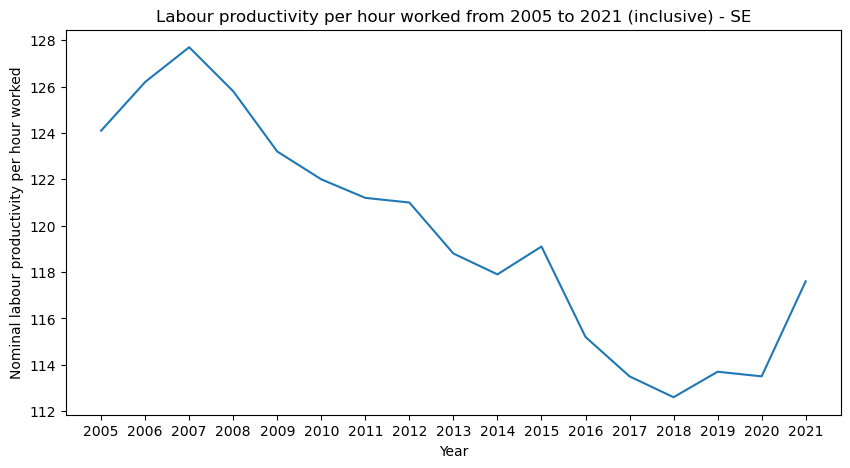

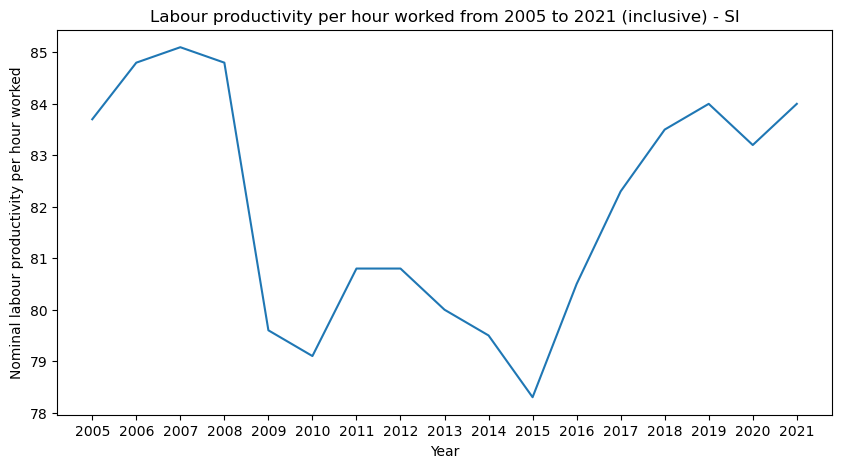

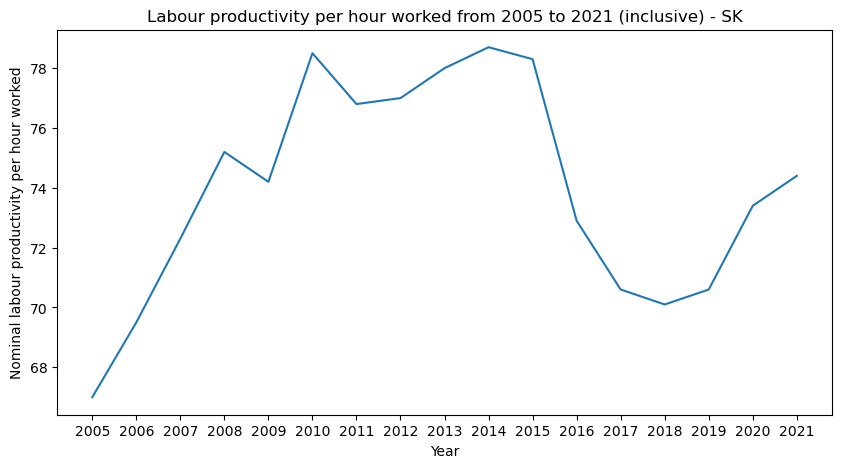

In [93]:
# plots each individual country throughout time

for row in range(numberOfRowsPHW):
    plt.figure(figsize=(10, 5))
    countryCode = cleanedData.iloc[row][0]
    plt.plot(np.array(cleanedData.columns[1:]), cleanedData.iloc[row][1:])

    plt.xlabel('Year') 
    plt.ylabel('Nominal labour productivity per hour worked') 
    plt.title("Labour productivity per hour worked from 2005 to 2021 (inclusive) - " + countryCode)

    plt.show()

In [94]:
countryCodesPHW = []
countryMeansPHW = []

for row in range(numberOfRowsPHW):
    countryCode = cleanedData.iloc[row][0]
    countryCodesPHW.append(countryCode)
    countryMeansPHW.append(float(np.mean(cleanedData.iloc[row][1:])))

cleanedData['mean'] = countryMeansPHW

/var/folders/jv/flhd9_611gvdf13cfv1w9t640000gn/T/ipykernel_98568/3326883711.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(countryCodesPHW[countryMeansPHW.index(sortedcountryMeansPHW[row])], sortedcountryMeansPHW[row], c=colorsPHW[row])


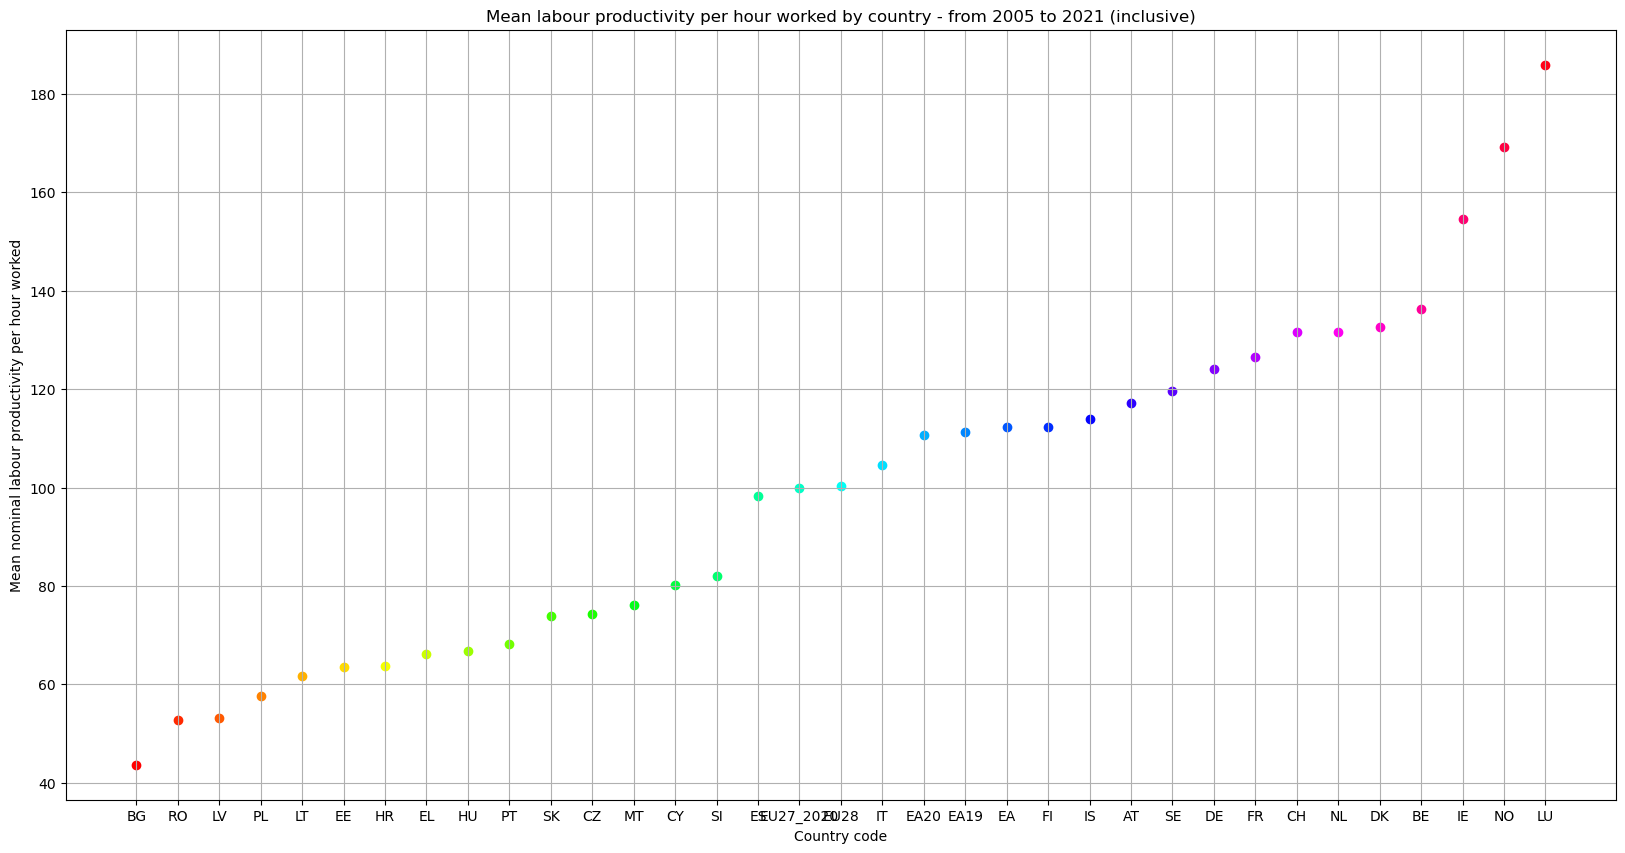

In [95]:
# plots every country's average - ordered

plt.figure(figsize=(20, 10))

sortedcountryMeansPHW = np.sort(countryMeansPHW)

for row in range(numberOfRowsPHW):
    plt.scatter(countryCodesPHW[countryMeansPHW.index(sortedcountryMeansPHW[row])], sortedcountryMeansPHW[row], c=colorsPHW[row])

plt.grid()

plt.xlabel('Country code') 
plt.ylabel('Mean nominal labour productivity per hour worked') 
plt.title("Mean labour productivity per hour worked by country - from 2005 to 2021 (inclusive)")
plt.show()

In [96]:
EuropeanUnion27 = 'EU27_2020' #27 countries (from 2020)
EuropeanUnion28 = 'EU28' #28 countries (2013-2020)
EuroArea = 'EA' #(EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)
EuroArea20 = 'EA20' #20 countries (from 2023)
EuroArea19 = 'EA19' #19 countries  (2015-2022)

Belgium = 'BE'
Bulgaria = 'BG'
CzechRepublic = 'CZ'
Denmark = 'DK'
Germany = 'DE'
Estonia = 'EE'
Ireland = 'IE'
Greece = 'EL'
Spain = 'ES'
France = 'FR'
Croatia = 'HR'
Italy = 'IT'
Cyprus = 'CY'
Latvia = 'LV'
Lithuania = 'LT'
Luxembourg = 'LU'
Hungary = 'HU'
Malta = 'MT'
Netherlands = 'NL'
Austria = 'AT'
Poland = 'PL'
Portugal = 'PT'
Romania = 'RO'
Slovenia = 'SI'
Slovakia = 'SK'
Finland = 'FI'
Sweden = 'SE'
Iceland = 'IS'
Liechtenstein = 'LI'
Norway = 'NO'
Switzerland = 'CH'
UnitedKingdom = 'UK' 
Montenegro = 'ME'
NorthMacedonia = 'MK' 
Albania = 'AL'
Serbia = 'RS'
Turkey = 'TR'

In [97]:
# accordignly to https://www.cia.gov/the-world-factbook/field/location/

CentralEurope = [Austria, CzechRepublic, Germany, Hungary, Liechtenstein, Poland, Slovakia, Slovenia, Switzerland]
EasternEurope = [Estonia, Latvia, Lithuania]
NorthernEurope = [Denmark, Finland, Norway, Sweden, Iceland]
SouthEasternEurope = [Albania, Bulgaria, Croatia, Montenegro, NorthMacedonia, Romania, Serbia, Turkey, Cyprus]
SouthernEurope = [Greece, Italy, Malta]
SouthWesternEurope = [Portugal, Spain]
WesternEurope = [Belgium, France, Ireland, Luxembourg, Netherlands, UnitedKingdom]

europeanRegions = [CentralEurope, EasternEurope, NorthernEurope, SouthEasternEurope, SouthernEurope, SouthWesternEurope, WesternEurope]

In [98]:
# computes the mean of each european region

regionMeans = []

for region in europeanRegions:
    mean = 0
    count = 0

    for country in region:
        if country in countryCodesPHW:
            mean += float(cleanedData.loc[cleanedData['countryCode'] == country]['mean'])
            count += 1

    mean = mean/count
    regionMeans.append(mean)

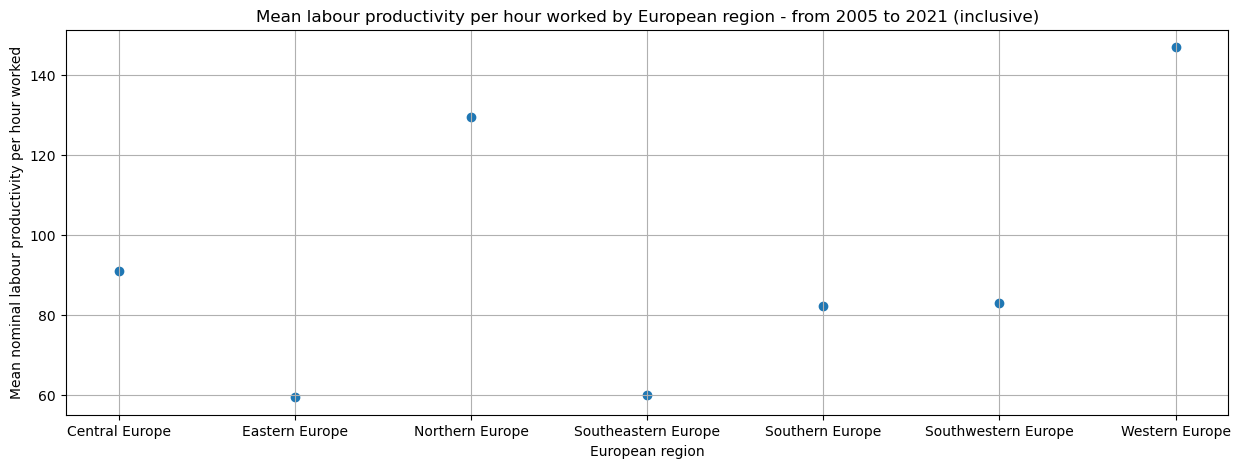

In [99]:
# plots the mean of every european region

plt.figure(figsize=(15, 5))

plt.scatter(['Central Europe', 'Eastern Europe', 'Northern Europe', 'Southeastern Europe', 'Southern Europe', 'Southwestern Europe', 'Western Europe'], regionMeans)

plt.grid()

plt.xlabel('European region') 
plt.ylabel('Mean nominal labour productivity per hour worked') 
plt.title("Mean labour productivity per hour worked by European region - from 2005 to 2021 (inclusive)")
plt.show()

In [100]:
# saves the cleaned productivity dataset under the Datasets folder

cleanedData.to_csv('../Datasets/cleaned_originalProductivity.csv', index=False)